# Interpolación utilizando la matriz de  Vandermonde

En el notebook anterior, trabajamos la idea de 

In [1]:
using Pkg

### Instalar Special Matrices

> A Julia package for working with special matrix types.

> This package extends the LinearAlgebra library with support for special matrices which are used in linear algebra. Every special matrix has its own type. The full matrix is accessed by the command Matrix(A).

In [2]:
#Instalar SpecialMatrices
Pkg.add("SpecialMatrices") #Una sola vez 

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [=====>                                   ]  12.5 %>                              ]  24.7 % [===========>                             ]  26.4 %38.6 % %>               ]  61.5 %==============================>          ]  73.8 %]  86.0 %Fetching: [=======================================> ]  97.3 % Resolving package versions...
 Installed FFTW_jll ──────── v3.3.9+4
 Installed SpecialMatrices ─ v1.0.0
 Installed MKL_jll ───────── v2019.0.117+2
 Installed ZeroMQ_jll ────── v4.3.2+1
 Installed Knockout ──────── v0.2.4
 Installed DataStructures ── v0.17.10
 Installed StatsBase ─────── v0.32.1
 Installed GeometryTypes ─── v0.7.10
 Installed IntelOpenMP_jll ─ v2018.0.3+0
 Installed Parsers ───────── v0.3.12
 Installed Conda ─────────── v1.4.1
 Installed FFTW ──────────── v1.2.0
 Installed Polynomials

In [5]:
using SpecialMatrices
using Plots
# declaramos gr como backend:
gr()

Plots.GRBackend()

In [89]:
a = collect(-5.0:1:5.0)

11-element Array{Float64,1}:
 -5.0
 -4.0
 -3.0
 -2.0
 -1.0
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0

In [90]:
 A = Vandermonde(a)

11×11 Vandermonde{Float64}:
 1.0  -5.0  25.0  -125.0  625.0  -3125.0  …       -1.95313e6      9.76563e6
 1.0  -4.0  16.0   -64.0  256.0  -1024.0     -262144.0            1.04858e6
 1.0  -3.0   9.0   -27.0   81.0   -243.0      -19683.0        59049.0      
 1.0  -2.0   4.0    -8.0   16.0    -32.0        -512.0         1024.0      
 1.0  -1.0   1.0    -1.0    1.0     -1.0          -1.0            1.0      
 1.0   0.0   0.0     0.0    0.0      0.0  …        0.0            0.0      
 1.0   1.0   1.0     1.0    1.0      1.0           1.0            1.0      
 1.0   2.0   4.0     8.0   16.0     32.0         512.0         1024.0      
 1.0   3.0   9.0    27.0   81.0    243.0       19683.0        59049.0      
 1.0   4.0  16.0    64.0  256.0   1024.0      262144.0            1.04858e6
 1.0   5.0  25.0   125.0  625.0   3125.0  …        1.95313e6      9.76563e6

In [91]:
b = [cos(i) for i in a]

11-element Array{Float64,1}:
  0.28366218546322625
 -0.6536436208636119 
 -0.9899924966004454 
 -0.4161468365471424 
  0.5403023058681398 
  1.0                
  0.5403023058681398 
 -0.4161468365471424 
 -0.9899924966004454 
 -0.6536436208636119 
  0.28366218546322625

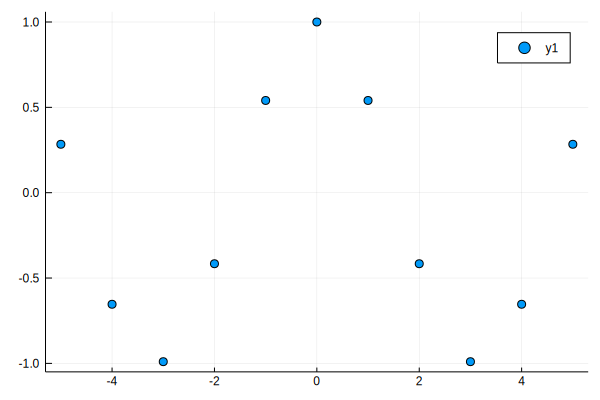

In [92]:
scatter(a,b)

In [93]:
c = A \ b

11-element Array{Float64,1}:
  1.0                   
  1.6653345369377348e-16
 -0.499977773046193     
  0.0                   
  0.041634003564786366  
  8.673617379884035e-19 
 -0.001376895518351535  
  0.0                   
  2.3151897072861865e-5 
  2.117582368135751e-22 
 -1.8102917490865718e-7 

In [94]:
length(c)

11

In [95]:
length(a)

11

In [96]:
pol = c[1] .+ c[2]*a .+ c[3]*a.^2 .+ c[4]*a.^3 .+ c[5]*a.^4 .+ c[6]*a.^5 .+ c[7]*a.^6 .+ c[8]*a.^7 .+ c[9]*a.^8 .+ c[10]*a.^9 .+ c[11]*a.^10

11-element Array{Float64,1}:
  0.2836621854632255 
 -0.6536436208636126 
 -0.989992496600446  
 -0.4161468365471426 
  0.5403023058681398 
  1.0                
  0.5403023058681402 
 -0.4161468365471418 
 -0.9899924966004446 
 -0.6536436208636089 
  0.28366218546323707

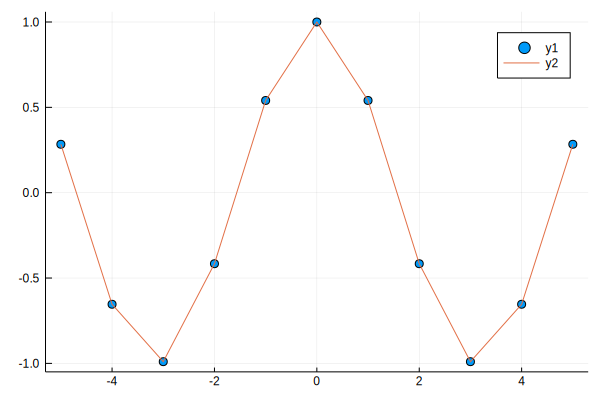

In [97]:
scatter(a,b)
plot!(a, pol)

In [98]:
pol2 = c[1] .+ c[2]*a .+ c[3]*a.^2 .+ c[4]*a.^3 .+ c[5]*a.^4 .+ c[6]*a.^5 
        .+ c[7]*a.^6 .+ c[8]*a.^7 .+ c[9]*a.^8 .+ c[10]*a.^9 .+ c[11]*a.^10

11-element Array{Float64,1}:
 -14.238145716373422   
  -4.312304164709832   
  -0.8625468279324037  
  -0.08237980139895207 
  -0.001353924650453582
   0.0                 
  -0.001353924650453582
  -0.08237980139895207 
  -0.8625468279324037  
  -4.312304164709832   
 -14.238145716373422   

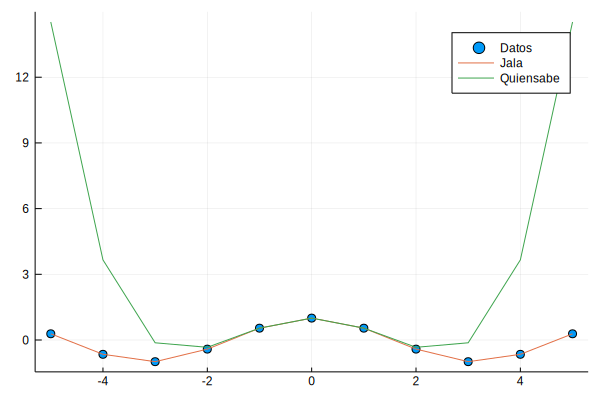

In [99]:
scatter(a,b, label="Datos")
plot!(a, pol, label="Jala")
plot!(a, pol2, label="Quiensabe")

In [102]:
function pol03(a, c)
    polinomio2 = zeros(length(a))
    for i in 1:length(a)
        polinomio2 .+= c[i]*a.^(i-1) 
    end
    
    return polinomio2
end
        

pol03 (generic function with 1 method)

In [104]:
pol3 = pol03(a,c)

11-element Array{Float64,1}:
  0.2836621854632255 
 -0.6536436208636126 
 -0.989992496600446  
 -0.4161468365471426 
  0.5403023058681398 
  1.0                
  0.5403023058681402 
 -0.4161468365471418 
 -0.9899924966004446 
 -0.6536436208636089 
  0.28366218546323707

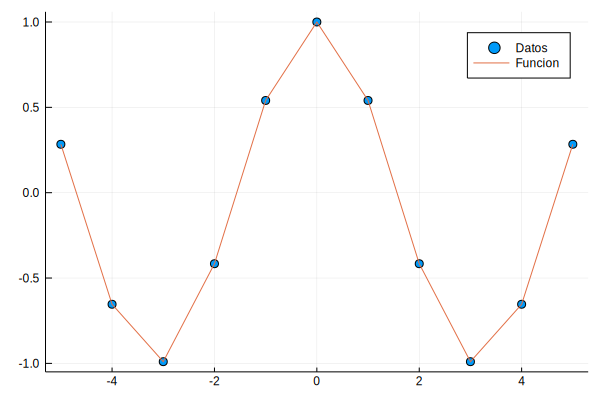

In [108]:
scatter(a,b, label="Datos")
#plot!(a, pol, label="Jala")
#plot!(a, pol2, label="Quiensabe")
plot!(a, pol3, label="Funcion")